### Работа с CSV файлом

#### Считывание CSV файла как текстового файла

In [2]:
# Считывание CSV файла
csvfile = open('titanic.csv', 'r') 
titanic_lst = csvfile.readlines()
len(titanic_lst)

888

In [3]:
# Закроем файл
csvfile.close()

In [4]:
titanic_lst[0]

'Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare\n'

Выжил, класс каюты, Имя, Пол, Возраст, Братья и сестры/супруги на борту, Родители/Дети на борту, Плата за проезд

In [5]:
titanic_lst[1:3]

['0,3,Mr. Owen Harris Braund,male,22,1,0,7.25\n',
 '1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833\n']

#### Использование бибилиотеки CSV

In [6]:
# Считывание CSV файла
import csv
csvfile = open('titanic.csv', newline='') 
titanic_reader = csv.reader(csvfile, delimiter=',')

In [7]:
titanic_lst = []
for row in titanic_reader:
    titanic_lst.append(row)
len(titanic_lst)

888

In [8]:
# Закроем файл
csvfile.close()

In [9]:
titanic_lst[0]

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [10]:
titanic_lst[1:4]

[['0', '3', 'Mr. Owen Harris Braund', 'male', '22', '1', '0', '7.25'],
 ['1',
  '1',
  'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
  'female',
  '38',
  '1',
  '0',
  '71.2833'],
 ['1', '3', 'Miss. Laina Heikkinen', 'female', '26', '0', '0', '7.925']]

#### Считывание CSV файла в формате словаря
Позволяет рассматривать первую строку, как заголовок, как ключи для доступа к данным

In [11]:
# Считывание CSV файла в формате словаря
import csv
with open('titanic.csv', newline='') as csvfile: 
    titanic_reader = csv.DictReader(csvfile)

    titanic_lst = []
    for row in titanic_reader:
        titanic_lst.append(row)
    print(len(titanic_lst))

887


In [12]:
titanic_lst[0]

{'Survived': '0',
 'Pclass': '3',
 'Name': 'Mr. Owen Harris Braund',
 'Sex': 'male',
 'Age': '22',
 'Siblings/Spouses Aboard': '1',
 'Parents/Children Aboard': '0',
 'Fare': '7.25'}

In [13]:
# Использование библиотеки collections (работа с разными типами структур данных)
from collections import defaultdict
titanic_dict = defaultdict(list)
for row in titanic_lst:
    for item in row.items():
        titanic_dict[item[0]].append(item[1])
len(titanic_dict)


8

In [14]:
titanic_dict.keys()

dict_keys(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'])

In [15]:
len(titanic_dict['Survived']), titanic_dict['Survived'][:10]

(887, ['0', '1', '1', '1', '0', '0', '0', '0', '1', '1'])

In [96]:
### Задание для самостоятельного решения № 1 ###
for i in  range (len(titanic_dict['Survived'])):
  titanic_dict['Survived'][i] = int(titanic_dict['Survived'][i])

print('Количество выживших: {}'.format(sum(titanic_dict['Survived'])))
# Преобразуйте колонку 'Survived' в тип int без применения библиотеки numpy. 
# Сумму по всему столбцу запишите в поле ответа. 
#sum(titanic_int)

Количество выживших: 342


#### Запись CSV Файла

In [17]:
# транспонированый датасет titanic и запишем в файл 
filename = 'titanic_T.csv'
with open(filename, "w") as csvfile:
    csvwriter = csv.writer(csvfile,  delimiter=',')
    for k in titanic_dict.keys():
        csvwriter.writerow([k] + titanic_dict[k])

### Numpy - библиотека для работы с массивами

In [18]:
import numpy as np

In [19]:
type(titanic_dict['Pclass'])

list

In [20]:
# Поиск и отображение уникальных значений
for k in titanic_dict.keys():
    unique = np.unique(titanic_dict[k])
    print(k+': ', np.unique(titanic_dict[k])) if unique.size < 10 else print(k+': ', np.unique(titanic_dict[k])[:10])

Survived:  [0 1]
Pclass:  ['1' '2' '3']
Name:  ['Capt. Edward Gifford Crosby' 'Col. John Weir'
 'Col. Oberst Alfons Simonius-Blumer' 'Don. Manuel E Uruchurtu'
 'Dr. Alfred Pain' 'Dr. Alice (Farnham) Leader' 'Dr. Arthur Jackson Brewe'
 'Dr. Ernest Moraweck' 'Dr. Henry William Frauenthal'
 'Dr. Max Stahelin-Maeglin']
Sex:  ['female' 'male']
Age:  ['0.42' '0.67' '0.75' '0.83' '0.92' '1' '10' '11' '12' '13']
Siblings/Spouses Aboard:  ['0' '1' '2' '3' '4' '5' '8']
Parents/Children Aboard:  ['0' '1' '2' '3' '4' '5' '6']
Fare:  ['0' '10.1708' '10.4625' '10.5' '10.5167' '106.425' '108.9' '11.1333'
 '11.2417' '11.5']


In [21]:
# Преобразуем типы целых и вещественных колонок
for t, columns in {'int':['Survived', 'Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], 
                   'float':['Age', 'Fare']}.items():
    for col in columns:
        titanic_dict[col] = np.array(titanic_dict[col]).astype(t)

In [22]:
titanic_dict['Survived'][:10], titanic_dict['Age'][:10]

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1]),
 array([22., 38., 26., 35., 35., 27., 54.,  2., 27., 14.]))

In [23]:
# Кол-во пассажиров / кол-во выживших
titanic_dict['Survived'].size, titanic_dict['Survived'].sum()

(887, 342)

In [24]:
# Округлим стоимость билета до десятых долей.
np.round(titanic_dict['Fare'], 1)[:10]

array([ 7.2, 71.3,  7.9, 53.1,  8. ,  8.5, 51.9, 21.1, 11.1, 30.1])

In [94]:
### Задание для самостоятельного решения № 2 ###
# .........................................
# Посчитайте количество пассажиров с родственниками ('Siblings/Spouses Aboard') в количетсве более 3.
# .........................................
counter_Aboard = 0

for i in range(len(titanic_dict['Siblings/Spouses Aboard'])):
    if titanic_dict['Siblings/Spouses Aboard'][i] >= 3:
        counter_Aboard += 1
        
print('Пассажиров с родственниками: {}'.format(counter_Aboard))


Пассажиров с родственниками: 46


### Простые статистики

In [26]:
# Максимальный, минимальный, средний возраст, стоимость билета
for feature in ['Age', 'Fare']:
    print(feature+'\n  max: {}, min: {}, mean: {}, median: {}, std: {}'.format(np.round(titanic_dict[feature].max(), 2), 
                                                                               np.round(titanic_dict[feature].min(), 2),
                                                                               np.round(titanic_dict[feature].mean(), 2),
                                                                               np.round(np.median(titanic_dict[feature]), 2),
                                                                               np.round(titanic_dict[feature].std(), 2)
                                                                               ))

Age
  max: 80.0, min: 0.42, mean: 29.47, median: 28.0, std: 14.11
Fare
  max: 512.33, min: 0.0, mean: 32.31, median: 14.45, std: 49.75


### Фильтрация по условию

In [27]:
# Количество пассажиров разного класса
np.unique(titanic_dict['Pclass'], return_counts=True)

(array([1, 2, 3]), array([216, 184, 487], dtype=int64))

In [28]:
np.where(titanic_dict['Pclass']==1)

(array([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,  51,  53,  54,
         60,  61,  63,  82,  87,  91,  95,  96, 101, 109, 117, 123, 135,
        136, 138, 150, 154, 165, 167, 169, 173, 176, 184, 186, 193, 194,
        208, 214, 217, 223, 229, 244, 247, 251, 255, 256, 257, 260, 261,
        266, 267, 268, 271, 273, 282, 288, 289, 293, 295, 296, 297, 303,
        304, 305, 307, 308, 309, 316, 317, 323, 327, 329, 330, 332, 334,
        335, 337, 339, 349, 354, 364, 367, 368, 371, 373, 375, 378, 381,
        388, 391, 410, 427, 431, 432, 435, 442, 444, 446, 449, 450, 453,
        454, 457, 459, 464, 472, 481, 483, 484, 489, 490, 493, 495, 501,
        502, 504, 509, 510, 512, 517, 520, 524, 533, 534, 536, 537, 541,
        542, 547, 552, 553, 554, 555, 568, 569, 574, 578, 580, 582, 584,
        588, 596, 599, 601, 604, 606, 618, 622, 624, 627, 629, 630, 638,
        642, 644, 656, 657, 659, 666, 668, 676, 678, 686, 687, 691, 695,
        697, 698, 704, 705, 707, 708, 709, 713, 720

In [29]:
# Количество выживших по классам
for pcls in np.unique(titanic_dict['Pclass']):
    survived = titanic_dict['Survived'][np.where(titanic_dict['Pclass']==pcls)[0]]
    uniq, cnt = np.unique(survived, return_counts=True)
    print(uniq, cnt)
    print('Доля выживших пассажиров {}-го класса: {}'.format(pcls, cnt[1]/survived.size))

[0 1] [ 80 136]
Доля выживших пассажиров 1-го класса: 0.6296296296296297
[0 1] [97 87]
Доля выживших пассажиров 2-го класса: 0.47282608695652173
[0 1] [368 119]
Доля выживших пассажиров 3-го класса: 0.24435318275154005


In [93]:
### Задание для самостоятельного решения № 3
# .........................................
# Вычислите средний возраст мужчин и женщин и долю выживших по полу. 
# (Имейте в виду, что функция np.where не умеет работать с типом string)
# .........................................

male_counter = 0
male_age_general = 0
male_survived = 0

female_counter = 0
female_age_general = 0
female_survived = 0

titanic_dict['Sex'][:10]

for i in range(len(titanic_dict['Sex'])):
    if titanic_dict['Sex'][i] == 'male':
        male_counter += 1
        male_age_general += titanic_dict['Age'][i]
        male_survived += titanic_dict['Survived'][i]
    else:
        female_counter += 1
        female_age_general += titanic_dict['Age'][i]
        female_survived += titanic_dict['Survived'][i]

print('Средний возраст мужчин: {:.2f}'.format(male_age_general/male_counter))
print('Средний возраст женщин: {:.2f}'.format(female_age_general/female_counter))
print('Выжило мужчин: {}'.format(male_survived))
print('Выжило девушек: {}'.format(female_survived))
print('Общее количество выживших: {}'.format(sum(titanic_dict['Survived'])))
print('Выжило мужчин: {:.2%}, выжило девушек: {:.2%}'.format(male_survived/sum(titanic_dict['Survived']), female_survived/sum(titanic_dict['Survived'])))

Средний возраст мужчин: 30.43
Средний возраст женщин: 27.72
Выжило мужчин: 109
Выжило девушек: 233
Общее количество выживших: 342
Выжило мужчин: 31.87%, выжило девушек: 68.13%


### Matplotlib

In [31]:
import matplotlib.pyplot as plt

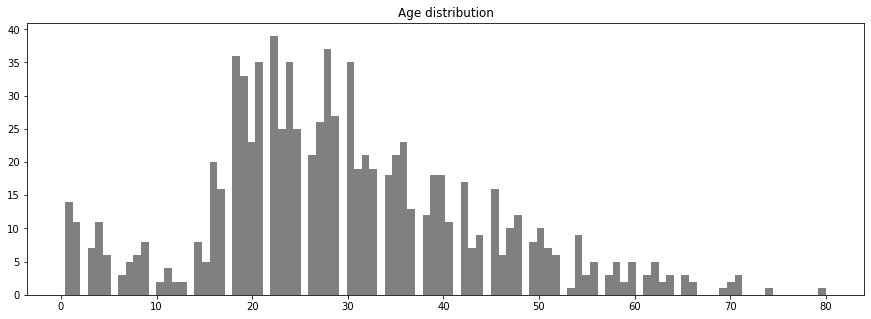

In [32]:
# Гистограмма распределения возрастов 
plt.figure(figsize=(15,5))
plt.hist(titanic_dict['Age'], bins=100, color='grey');
plt.title('Age distribution');
plt.show();

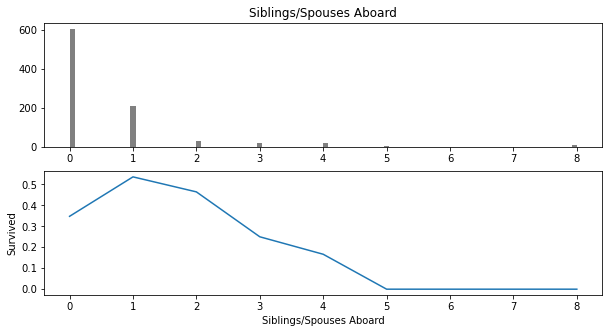

In [33]:
# Определим долю выживших для уникальных значений признака 'Siblings/Spouses Aboard'
relatives_num = np.unique(titanic_dict['Siblings/Spouses Aboard'])
relatives_num = np.sort(relatives_num)
survived_total = []
for i in relatives_num:
    survived = titanic_dict['Survived'][np.where(titanic_dict['Siblings/Spouses Aboard'] == i)[0]]
    survived_total.append(survived.sum()/survived.size)
    
# Построим распределение признака 'Siblings/Spouses Aboard' и зависимость выживаемости от числа родственников 
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.hist(titanic_dict['Siblings/Spouses Aboard'], bins=100, color='grey');
plt.title('Siblings/Spouses Aboard');

plt.subplot(2,1,2)
plt.plot(relatives_num, survived_total);
plt.xlabel('Siblings/Spouses Aboard');
plt.ylabel('Survived')

plt.show();

In [34]:
# Сформируем массив выживаемости для каждого класса
survived_lst = []
for pcls in np.unique(titanic_dict['Pclass']):
    survived = np.array(titanic_dict['Survived'])[np.where(titanic_dict['Pclass']==pcls)[0]]
    uniq, cnt = np.unique(survived, return_counts=True)
    survived_lst.append(cnt)
    print('PClass {}: {}'.format(pcls, cnt))

PClass 1: [ 80 136]
PClass 2: [97 87]
PClass 3: [368 119]


In [35]:
# Преобразуем список списков survived_lst в двумерный массив
survived_arr = np.array(survived_lst)
survived_arr

array([[ 80, 136],
       [ 97,  87],
       [368, 119]], dtype=int64)

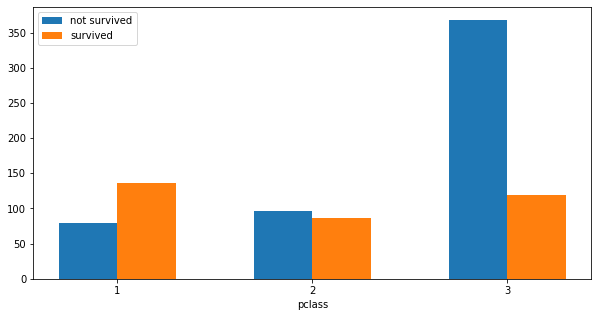

In [36]:
# Построим зависимость выживаемости пассажира от класса (Pclass)
pclass_lst = np.arange(1, np.unique(titanic_dict['Pclass']).size + 1)
width = 0.3
plt.figure(figsize=(10,5))
plt.bar(pclass_lst - width/2, survived_arr[:,0], width, label='not survived')
plt.bar(pclass_lst + width/2, survived_arr[:,1], width, label='survived')
plt.xlabel('pclass')
plt.legend(['not survived', 'survived'])

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(3))

plt.show()

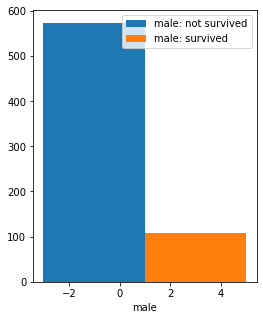

573
109


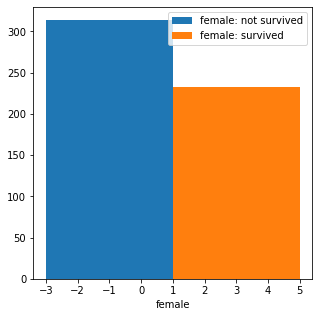

314
233


In [84]:
### Задание для самостоятельного решения № 4
# Построить распределения возрастов мужчин и женщин в отдельных графиках и раскрасить выживших и не выживших в разные цвета
# .........................................
pclass_lst = 1
width = 4
plt.figure(figsize=(4,5))
plt.bar(pclass_lst - width/2, male_counter, width, label='not survived')
plt.bar(pclass_lst + width/2, male_survived, width, label='survived')
plt.xlabel('male')
plt.legend(['male: not survived', 'male: survived'])

ax = plt.gca()

plt.show()
print(male_counter)
print(male_survived)

pclass_lst = 1
width = 4
plt.figure(figsize=(5,5))
plt.bar(pclass_lst - width/2, female_counter, width, label='not survived')
plt.bar(pclass_lst + width/2, female_survived, width, label='survived')
plt.xlabel('female')
plt.legend(['female: not survived', 'female: survived'])

ax = plt.gca()

plt.show()
print(female_counter)
print(female_survived)

### Работа с текстовыми данными

In [ ]:
# Дополнительный признак: обращение к человеку
# Обращение ставится в начале имени и отделяется точкой.
appeal = np.unique([f.split('.')[0] for f in titanic_dict['Name']], return_counts=True)
for name, cnt in zip(appeal[0], appeal[1]):
    print(str(name)+': '+str(cnt))

Capt: 1
Col: 2
Don: 1
Dr: 7
Jonkheer: 1
Lady: 1
Major: 2
Master: 40
Miss: 182
Mlle: 2
Mme: 1
Mr: 513
Mrs: 125
Ms: 1
Rev: 6
Sir: 1
the Countess: 1


In [ ]:
# Выведем список детей мужского пола
[f for f in titanic_dict['Name'] if 'Master' in f][:10]

['Master. Gosta Leonard Palsson',
 'Master. Eugene Rice',
 'Master. Juha Niilo Panula',
 'Master. William Frederick Goodwin',
 'Master. Harald Skoog',
 'Master. Gerios Moubarek',
 'Master. Alden Gates Caldwell',
 'Master. Elias Nicola-Yarred',
 'Master. Thomas Henry Sage',
 'Master. Eino Viljami Panula']

In [ ]:
titanic_dict['Master'] = [int('Master' in f) for f in titanic_dict['Name']]
np.unique(titanic_dict['Master'], return_counts=True)

(array([0, 1]), array([847,  40]))

In [92]:
### Задание для самостоятельного решения № 5
# Создать признак признак замужняя, незамужняя, остальные и построить распределение выживаемости
# .........................................
Mrs_count = 0
Unmrs_count = 0
for females in titanic_dict['Name']:
    if 'Mrs' in females:
        Mrs_count += 1
    if 'Miss' in females:
        Unmrs_count += 1
    if 'Ms' in females:
        Unmrs_count += 1
other_females = female_counter - (Mrs_count + Unmrs_count)

print('Замужних женщин: {}'.format(Mrs_count))
print('Незамужнищ женщин: {}'.format(Unmrs_count))
print('Остальные: {}'.format(other_females))

Замужних женщин: 125
Незамужнищ женщин: 183
Остальные: 6
